In [1]:
import gensim
import numpy as np

In [2]:
base = '../dat/vecs/'

embd_all = [
    'darwin_1.txt', 'darwin_2.txt', 'darwin_3.txt', 
    'joyce.txt', 'joyce_1.txt', 'joyce_2.txt', 'joyce_2.txt', 'joyce-dep.txt', 
    'food.txt', 'dickens.txt', 'law.txt', 'sherlock.txt', 'poetryengine.txt', 
    'nyt-science.txt', 'merge-science-small.txt', 'arxiv_abs.txt',
    'glove-slim.txt', 'oneb.txt']

embd_x = ['darwin_1.txt', 'joyce.txt', 'dickens.txt', 'law.txt', 'sherlock.txt', 'poetryengine.txt',
          'glove-slim.txt', 'word2vec-slim.txt', 'oneb.txt', 'food.txt', 'arxiv_abs.txt', 'nyt-science.txt']

embd_names = [name[:-4] for name in embd_x]
embd_fls = [base + name for name in embd_x]
embd_names

['darwin_1',
 'joyce',
 'dickens',
 'law',
 'sherlock',
 'poetryengine',
 'glove-slim',
 'word2vec-slim',
 'oneb',
 'food',
 'arxiv_abs',
 'nyt-science']

### Load embeddings

In [3]:
embd_vecs = []
for fle in embd_fls:
    vec = gensim.models.KeyedVectors.load_word2vec_format(fle)
    embd_vecs.append(vec)
    print('.', end=' ')

. . . . . . . . . . . . 

In [5]:
# get top n words in embeddings
def get_topn_vocab(filepath, topn=1000):
    # Return set of first topn words in filepath embedding file.
    words = set()
    with open(filepath, 'r') as fle:
        fle.readline()
        count = 0
        for line in fle:
            count += 1
            if count > topn:
                break
            words.add(line.split(' ')[0])
    return words

get_topn_vocab(embd_fls[0], topn=10)

{'a', 'and', 'as', 'in', 'is', 'of', 'on', 'that', 'the', 'to'}

In [16]:
n = 100000
shared = get_topn_vocab(embd_fls[0], topn=n)
for fle in embd_fls[1:]:
    vocab = get_topn_vocab(fle, topn=n)
    shared = shared.intersection(vocab)

shared = list(shared)
sz = len(shared)
sz

2110

In [17]:
matrices = []
pips = []
for vec in embd_vecs:
    m = np.zeros((sz, len(vec['the'])))
    for i, word in enumerate(shared):
        v = vec.word_vec(word)
        m[i, :] = v / np.sqrt((np.sum(v**2)))
    matrices.append(m)
    pips.append(np.matmul(m, m.transpose()))

### Look into word-level PIP

In [14]:
print(embd_names[0], pips[0].shape)
print(shared[0])
print(pips[0][0,:])
print(pips[0][:,0])
test = np.matmul(matrices[0], matrices[0][0,:])
print(test)

darwin_2 (2063, 2063)
aware
[0.99999996 0.03153258 0.24555808 ... 0.29975496 0.05260617 0.38812226]
[0.99999996 0.03153258 0.24555808 ... 0.29975496 0.05260617 0.38812226]
[0.99999996 0.03153258 0.24555808 ... 0.29975496 0.05260617 0.38812226]


In [18]:
num = len(embd_fls)
piploss = np.zeros((num, num))
for i in range(num):
    for j in range(num):
        if j > i:
            break
        piploss[i, j] = np.linalg.norm(pips[i] - pips[j])

np.set_printoptions(precision=0)
piploss

array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [1570.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [ 492., 1666.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [ 498., 1581.,  519.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [1267.,  456., 1351., 1280.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [1085.,  672., 1148., 1103.,  400.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [ 605., 1298.,  622.,  618., 1059.,  905.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [ 510., 1783.,  418.,  494., 1486., 1295.,  587.,    0.,    0.,
           0.,    0.,    0.],
       [ 584., 1893.,  457.,  560., 1587., 1392.,  715.,  254.,    0.,
           0.,    0.,    0.],
       [ 566., 1875.,  454.,  567., 1565., 1368.,  736.,  301.,  326.,
           0.,    0.

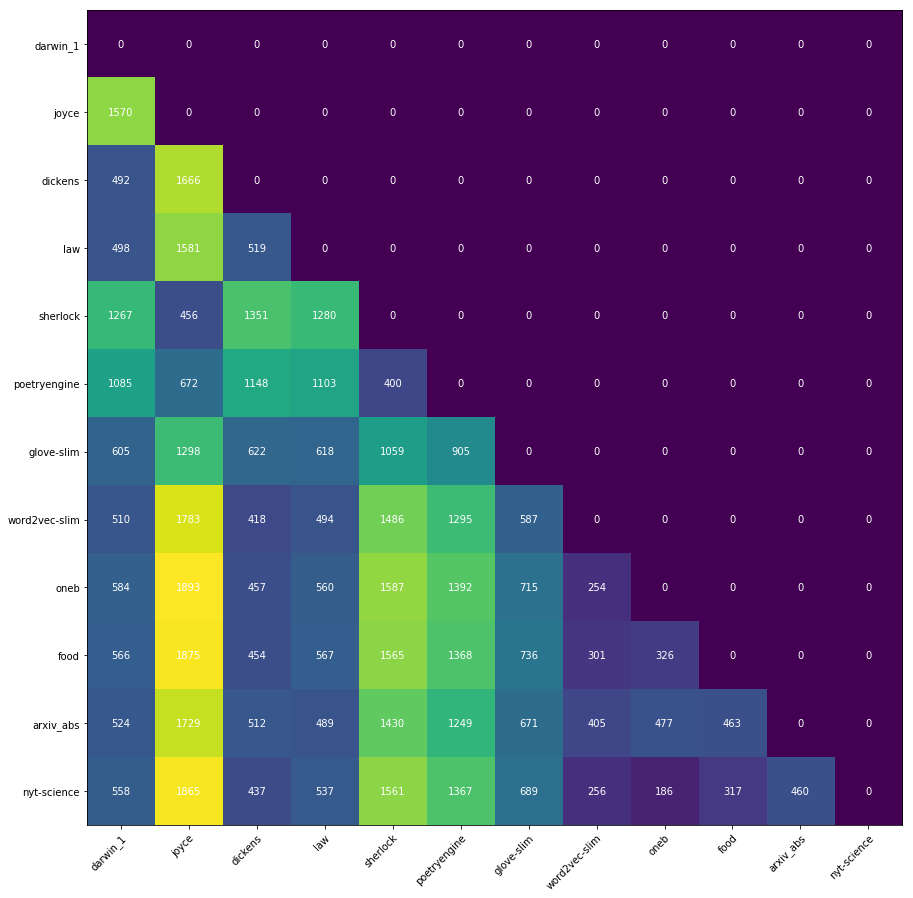

In [20]:
import matplotlib
import matplotlib.pyplot as plt

data = piploss

fig, ax = plt.subplots()
im = ax.imshow(data)

# We want to show all ticks...
ax.set_xticks(np.arange(len(embd_names)))
ax.set_yticks(np.arange(len(embd_names)))
# ... and label them with the respective list entries
ax.set_xticklabels(embd_names)
ax.set_yticklabels(embd_names)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(embd_names)):
    for j in range(len(embd_names)):
        text = ax.text(j, i, "{:.0f}".format(data[i, j]),
                       ha="center", va="center", color="w")

fig.set_size_inches(15, 15)
plt.show()

arxiv_abs
(200, 200)
each square represents distance between two words


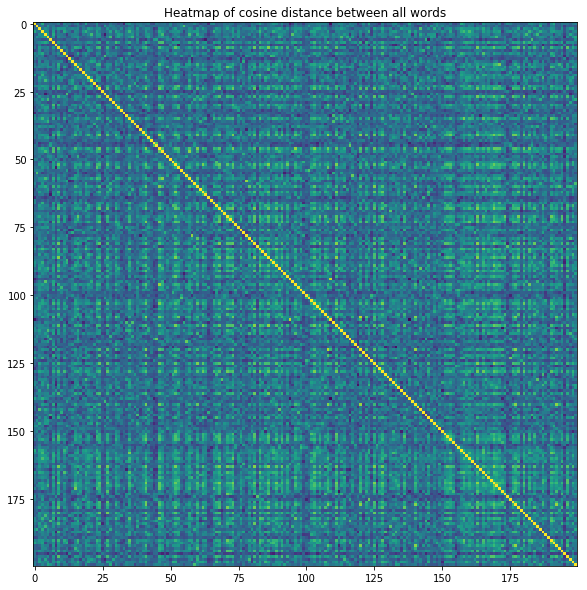

In [26]:
# data = piploss/1000
n = -1
print(embd_names[n])
data = pips[n]
# data = pips[0] - pips[4]
data = data[:200, :200]
print(data.shape)

fig, ax = plt.subplots()
im = ax.imshow(data)


fig.set_size_inches(10, 10)
ax.set_title("Heatmap of cosine distance between all words")
print('each square represents distance between two words')

arxiv_abs merge-science-small
(200, 200)
bright squares indicate word pair distances that are very DIFFERENT


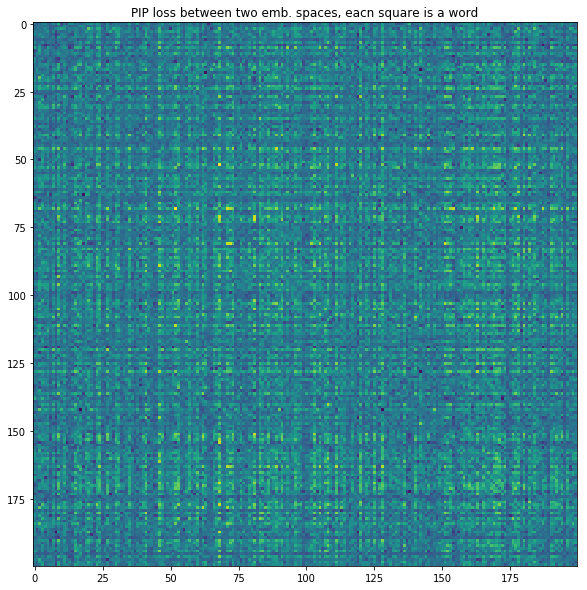

In [27]:
# data = piploss/1000
n = (-1, -2)
print(embd_names[n[0]], embd_names[n[1]])
data = pips[n[0]] - pips[n[1]]
data = data[:200, :200]
print(data.shape)

fig, ax = plt.subplots()
im = ax.imshow(data)


fig.set_size_inches(10, 10)
ax.set_title("PIP loss between two emb. spaces, eacn square is a word")
print('bright squares indicate word pair distances that are very DIFFERENT')

In [35]:
ind = np.unravel_index(np.argmin(data, axis=None), data.shape)
data[ind]
shared[ind[0]], shared[ind[1]]

('dr', 'l')

In [17]:
# VERY SLOW WHEN SHARED VOCAB IS >5K; SET N=10K BUT WOULD PREFER N=100K
def get_piploss(emb_id1, emb_id2):
    print(embd_names[emb_id1], embd_names[emb_id2], end=' ')
    n = 50000
    a = get_topn_vocab(embd_fls[emb_id1], topn=n)
    b = get_topn_vocab(embd_fls[emb_id2], topn=n)
    shared = set.intersection(*[a, b])

    shared = list(shared)
    sz = len(shared)
    print('num shared vocab:', sz)
    matrices = []
    pips = []
    for vec in [embd_vecs[emb_id1], embd_vecs[emb_id2]]:
        m = np.zeros((sz, len(vec['the'])))
        for i, word in enumerate(shared):
            v = vec.word_vec(word)
            m[i, :] = v / np.sqrt((np.sum(v**2)))
        matrices.append(m)
        pips.append(np.matmul(m, m.transpose()))
    piploss = np.linalg.norm(pips[0] - pips[1])
    return piploss

num = len(embd_names)
piploss = np.zeros((num, num))
for i in range(num):
    for j in range(num):
        if j >= i:
            break
        piploss[i, j] = get_piploss(i, j)

np.set_printoptions(precision=0)
piploss

joyce darwin_1 num shared vocab: 4408
dickens darwin_1 num shared vocab: 9441
dickens joyce num shared vocab: 6242
law darwin_1 num shared vocab: 6724
law joyce num shared vocab: 3742
law dickens num shared vocab: 8685
sherlock darwin_1 num shared vocab: 4314
sherlock joyce num shared vocab: 3903
sherlock dickens num shared vocab: 5845
sherlock law num shared vocab: 3861
poetryengine darwin_1 num shared vocab: 7190
poetryengine joyce num shared vocab: 5714
poetryengine dickens num shared vocab: 11313
poetryengine law num shared vocab: 6077
poetryengine sherlock num shared vocab: 4957
glove-slim darwin_1 num shared vocab: 10805
glove-slim joyce num shared vocab: 6365
glove-slim dickens num shared vocab: 17640
glove-slim law num shared vocab: 13123
glove-slim sherlock num shared vocab: 5873
glove-slim poetryengine num shared vocab: 13230
word2vec-slim darwin_1 num shared vocab: 8217
word2vec-slim joyce num shared vocab: 5391
word2vec-slim dickens num shared vocab: 13301
word2vec-slim law

array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [2996.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [2549., 4552.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [1804., 2666., 2447.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [2438.,  756., 3631., 2306.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [3544., 1409., 5688., 3317.,  812.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [4476., 5251., 7614., 4645., 4123., 9960.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [3016., 4708., 5260., 3724., 3888., 7912., 2525.,    0.,    0.,
           0.,    0.,    0.],
       [4907., 5678., 7661., 5521., 4637., 9893., 4892., 2702.,    0.,
           0.,    0.,    0.],
       [3785., 5116., 5468., 3510., 3994., 8519., 4402., 2530., 4586.,
           0.,    0.

In [38]:
x = 'joyce darwin_1 num shared vocab: 4408\n\
dickens darwin_1 num shared vocab: 9441\n\
dickens joyce num shared vocab: 6242\n\
law darwin_1 num shared vocab: 6724\n\
law joyce num shared vocab: 3742\n\
law dickens num shared vocab: 8685\n\
sherlock darwin_1 num shared vocab: 4314\n\
sherlock joyce num shared vocab: 3903\n\
sherlock dickens num shared vocab: 5845\n\
sherlock law num shared vocab: 3861\n\
poetryengine darwin_1 num shared vocab: 7190\n\
poetryengine joyce num shared vocab: 5714\n\
poetryengine dickens num shared vocab: 11313\n\
poetryengine law num shared vocab: 6077\n\
poetryengine sherlock num shared vocab: 4957\n\
glove-slim darwin_1 num shared vocab: 10805\n\
glove-slim joyce num shared vocab: 6365\n\
glove-slim dickens num shared vocab: 17640\n\
glove-slim law num shared vocab: 13123\n\
glove-slim sherlock num shared vocab: 5873\n\
glove-slim poetryengine num shared vocab: 13230\n\
word2vec-slim darwin_1 num shared vocab: 8217\n\
word2vec-slim joyce num shared vocab: 5391\n\
word2vec-slim dickens num shared vocab: 13301\n\
word2vec-slim law num shared vocab: 11220\n\
word2vec-slim sherlock num shared vocab: 5148\n\
word2vec-slim poetryengine num shared vocab: 10512\n\
word2vec-slim glove-slim num shared vocab: 23301\n\
oneb darwin_1 num shared vocab: 11034\n\
oneb joyce num shared vocab: 6295\n\
oneb dickens num shared vocab: 17193\n\
oneb law num shared vocab: 13993\n\
oneb sherlock num shared vocab: 5830\n\
oneb poetryengine num shared vocab: 12737\n\
oneb glove-slim num shared vocab: 37474\n\
oneb word2vec-slim num shared vocab: 23630\n\
food darwin_1 num shared vocab: 9606\n\
food joyce num shared vocab: 5771\n\
food dickens num shared vocab: 14154\n\
food law num shared vocab: 10622\n\
food sherlock num shared vocab: 5224\n\
food poetryengine num shared vocab: 11389\n\
food glove-slim num shared vocab: 22730\n\
food word2vec-slim num shared vocab: 16680\n\
food oneb num shared vocab: 23267\n\
arxiv_abs darwin_1 num shared vocab: 6455\n\
arxiv_abs joyce num shared vocab: 3525\n\
arxiv_abs dickens num shared vocab: 7663\n\
arxiv_abs law num shared vocab: 9317\n\
arxiv_abs sherlock num shared vocab: 3585\n\
arxiv_abs poetryengine num shared vocab: 5956\n\
arxiv_abs glove-slim num shared vocab: 12126\n\
arxiv_abs word2vec-slim num shared vocab: 10334\n\
arxiv_abs oneb num shared vocab: 12673\n\
arxiv_abs food num shared vocab: 10729\n\
nyt-science darwin_1 num shared vocab: 11182\n\
nyt-science joyce num shared vocab: 6276\n\
nyt-science dickens num shared vocab: 17280\n\
nyt-science law num shared vocab: 13877\n\
nyt-science sherlock num shared vocab: 5798\n\
nyt-science poetryengine num shared vocab: 13024\n\
nyt-science glove-slim num shared vocab: 36042\n\
nyt-science word2vec-slim num shared vocab: 22344\n\
nyt-science oneb num shared vocab: 36087\n\
nyt-science food num shared vocab: 23567\n\
nyt-science arxiv_abs num shared vocab: 12971'
num = len(embd_names)
piploss_norm = np.zeros((num, num))
shared_vocab = np.zeros((num, num))
lines = x.split("\n")
stuff = [l.strip('\n').split( ) for l in lines]
stuff
count = 0
for i in range(num):
    for j in range(num):
        if j >= i:
            break
        print(embd_names[i], embd_names[j], stuff[count])
        piploss_norm[i,j] = piploss[i,j] / int(stuff[count][-1])
        shared_vocab[i,j] = int(stuff[count][-1])
        count +=1
np.set_printoptions(precision=3)
piploss_norm

joyce darwin_1 ['joyce', 'darwin_1', 'num', 'shared', 'vocab:', '4408']
dickens darwin_1 ['dickens', 'darwin_1', 'num', 'shared', 'vocab:', '9441']
dickens joyce ['dickens', 'joyce', 'num', 'shared', 'vocab:', '6242']
law darwin_1 ['law', 'darwin_1', 'num', 'shared', 'vocab:', '6724']
law joyce ['law', 'joyce', 'num', 'shared', 'vocab:', '3742']
law dickens ['law', 'dickens', 'num', 'shared', 'vocab:', '8685']
sherlock darwin_1 ['sherlock', 'darwin_1', 'num', 'shared', 'vocab:', '4314']
sherlock joyce ['sherlock', 'joyce', 'num', 'shared', 'vocab:', '3903']
sherlock dickens ['sherlock', 'dickens', 'num', 'shared', 'vocab:', '5845']
sherlock law ['sherlock', 'law', 'num', 'shared', 'vocab:', '3861']
poetryengine darwin_1 ['poetryengine', 'darwin_1', 'num', 'shared', 'vocab:', '7190']
poetryengine joyce ['poetryengine', 'joyce', 'num', 'shared', 'vocab:', '5714']
poetryengine dickens ['poetryengine', 'dickens', 'num', 'shared', 'vocab:', '11313']
poetryengine law ['poetryengine', 'law', 

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   ],
       [0.68 , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   ],
       [0.27 , 0.729, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   ],
       [0.268, 0.712, 0.282, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   ],
       [0.565, 0.194, 0.621, 0.597, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   ],
       [0.493, 0.247, 0.503, 0.546, 0.164, 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   ],
       [0.414, 0.825, 0.432, 0.354, 0.702, 0.753, 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   ],
       [0.367, 0.873, 0.395, 0.332, 0.755, 0.753, 0.108, 0.   , 0.   ,
        0.   , 0.   , 0.   ],
       [0.445, 0.902, 0.446, 0.395, 0.795, 0.777, 0.131, 0.114, 0.   ,
        0.   , 0.   , 0.   ],
       [0.394, 0.886, 0.386, 0.33 , 0.765, 0.748, 0.194, 0.152, 0.197,
        0.   , 0.   

In [37]:
np.savetxt('piploss.txt', piploss)
np.savetxt('piploss_norm.txt', piploss_norm)
embd_names

['darwin_1',
 'joyce',
 'dickens',
 'law',
 'sherlock',
 'poetryengine',
 'glove-slim',
 'word2vec-slim',
 'oneb',
 'food',
 'arxiv_abs',
 'nyt-science']

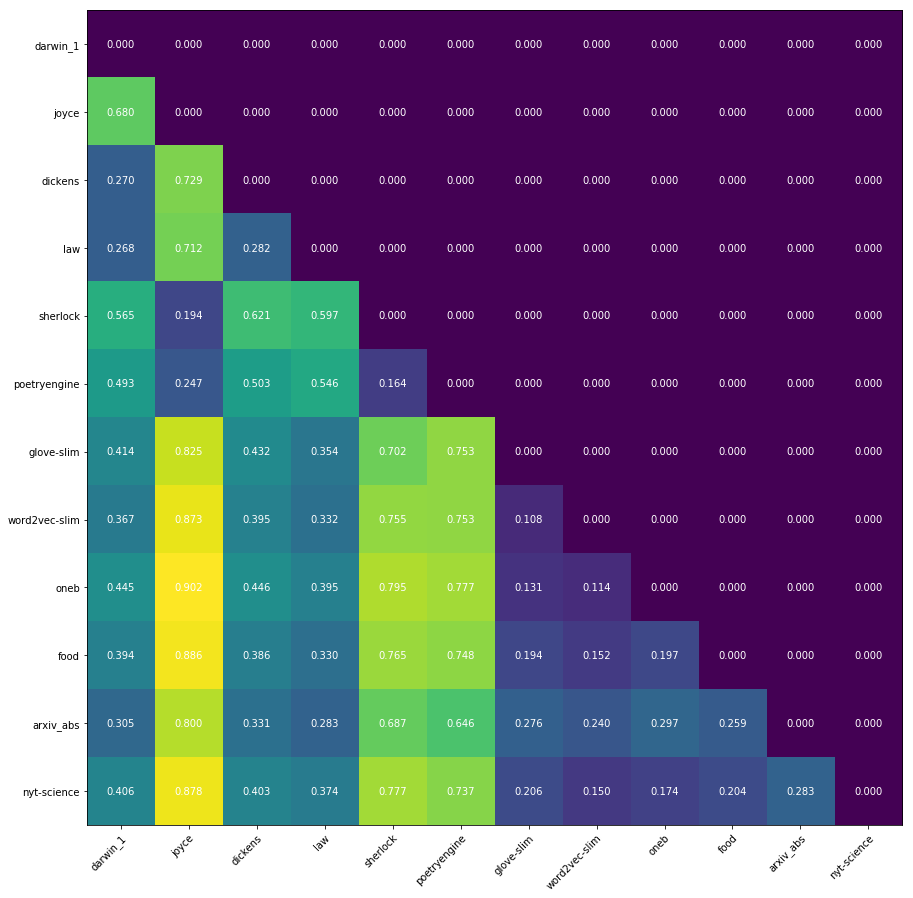

In [32]:
import matplotlib
import matplotlib.pyplot as plt

data = piploss_norm

fig, ax = plt.subplots()
im = ax.imshow(data)

# We want to show all ticks...
ax.set_xticks(np.arange(len(embd_names)))
ax.set_yticks(np.arange(len(embd_names)))
# ... and label them with the respective list entries
ax.set_xticklabels(embd_names)
ax.set_yticklabels(embd_names)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(embd_names)):
    for j in range(len(embd_names)):
        text = ax.text(j, i, "{:.3f}".format(data[i, j]),
                       ha="center", va="center", color="w")

fig.set_size_inches(15, 15)
plt.show()

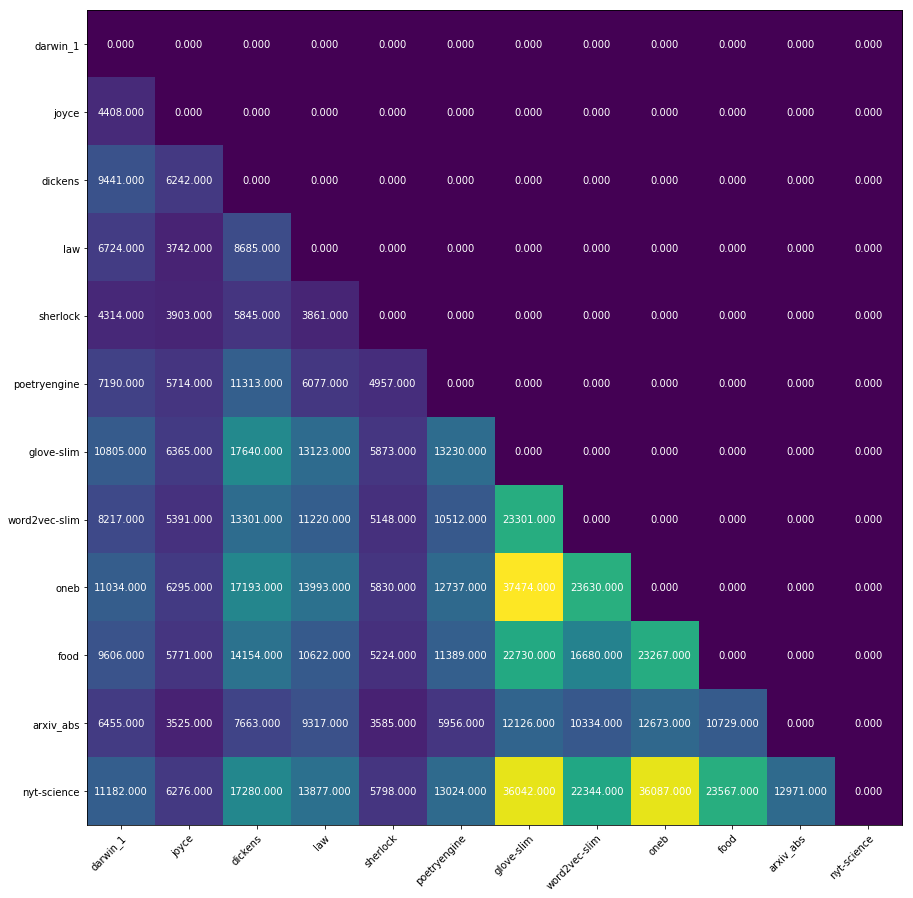

In [40]:
import matplotlib
import matplotlib.pyplot as plt
np.set_printoptions(precision=0)

data = shared_vocab

fig, ax = plt.subplots()
im = ax.imshow(data)

# We want to show all ticks...
ax.set_xticks(np.arange(len(embd_names)))
ax.set_yticks(np.arange(len(embd_names)))
# ... and label them with the respective list entries
ax.set_xticklabels(embd_names)
ax.set_yticklabels(embd_names)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(embd_names)):
    for j in range(len(embd_names)):
        text = ax.text(j, i, "{:.3f}".format(data[i, j]),
                       ha="center", va="center", color="w")

fig.set_size_inches(15, 15)
plt.show()

In [43]:
for i, n in enumerate(embd_names): print(i,n)

0 darwin_1
1 joyce
2 dickens
3 law
4 sherlock
5 poetryengine
6 glove-slim
7 word2vec-slim
8 oneb
9 food
10 arxiv_abs
11 nyt-science


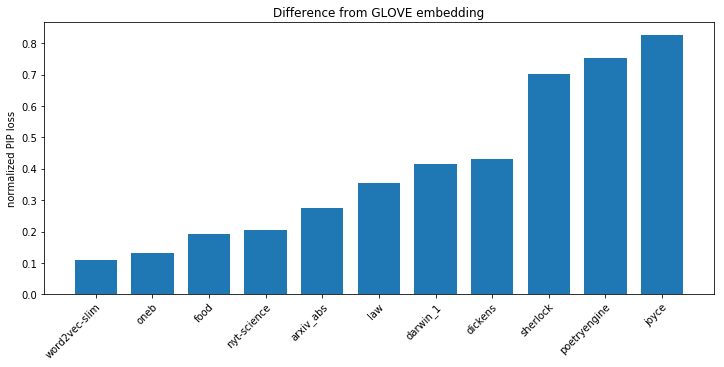

In [75]:
import numpy as np
import matplotlib.pyplot as plt

men_means = (20, 35, 30, 35, 27)
women_means = (25, 32, 34, 20, 25)

idx = [1, 10, 11]
# names = 
data = np.concatenate((piploss_norm[6,:6], piploss_norm[7:, 6]))
ordered = np.argsort(data)
data_o = data[ordered]
names = embd_names[:6] + embd_names[7:]
names_o = [names[i] for i in ordered]
# colors = ['SkyBlue', 'IndianRed', 'Green']
# labs = ['glove', 'w2v', 'oneb']

ind = np.arange(len(data))  # the x locations for the groups
width = 0.75  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, data_o, width)
# rects2 = ax.bar(ind + width/2, women_means, width,
#                 color='IndianRed', label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('normalized PIP loss')
ax.set_title('Difference from GLOVE embedding')
ax.set_xticks(ind)
ax.set_xticklabels(names_o)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
# ax.legend()
fig.set_size_inches(12, 5)
plt.show()

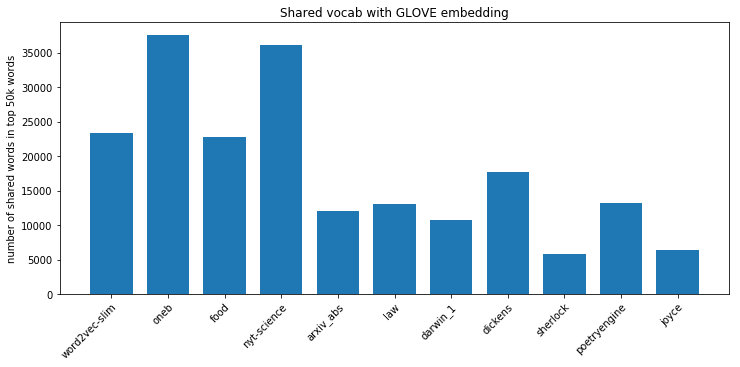

In [77]:
import numpy as np
import matplotlib.pyplot as plt

men_means = (20, 35, 30, 35, 27)
women_means = (25, 32, 34, 20, 25)

idx = [1, 10, 11]
# names = 
data = np.concatenate((shared_vocab[6,:6], shared_vocab[7:, 6]))
data_o = data[ordered]
names = embd_names[:6] + embd_names[7:]
names_o = [names[i] for i in ordered]
# colors = ['SkyBlue', 'IndianRed', 'Green']
# labs = ['glove', 'w2v', 'oneb']

ind = np.arange(len(data))  # the x locations for the groups
width = 0.75  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, data_o, width)
# rects2 = ax.bar(ind + width/2, women_means, width,
#                 color='IndianRed', label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of shared words in top 50k words')
ax.set_title('Shared vocab with GLOVE embedding')
ax.set_xticks(ind)
ax.set_xticklabels(names_o)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
# ax.legend()
fig.set_size_inches(12, 5)
plt.show()

In [66]:
np.set_printoptions(precision=3)
np.concatenate((piploss_norm[6,:6], piploss_norm[7:, 6]))

array([0.414, 0.825, 0.432, 0.354, 0.702, 0.753, 0.108, 0.131, 0.194,
       0.276, 0.206])

In [79]:
embd_vecs[1].most_similar('word', topn=10)

/Users/katy/Documents/Grad/thesaurusx/env/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('harm', 0.9906959533691406),
 ('true', 0.9871928095817566),
 ('idea', 0.9869378805160522),
 ('caesar', 0.9857110977172852),
 ('bitch', 0.985588550567627),
 ('offence', 0.9855548143386841),
 ('matter', 0.9854153990745544),
 ('since', 0.985365092754364),
 ('fellow', 0.985339879989624),
 ('fact', 0.98455411195755)]

In [107]:
import os

labels = []
overlap_data = {}
for filename in os.listdir('.'):
    if 'overlap' in filename:
        name = filename[:-4].split('glove-slim-')[1]
        array = np.loadtxt(filename)
        labels.append(name)
        overlap_data[name] = (np.mean(array), np.std(array))

labels, overlap_data

(['joyce',
  'dickens',
  'poetryengine',
  'word2vec-slim',
  'nyt-science',
  'arxiv_abs',
  'darwin',
  'sherlock',
  'oneb',
  'law'],
 {'joyce': (0.054695562435500514, 0.24486709014870323),
  'dickens': (0.1727810650887574, 0.5271043646557125),
  'poetryengine': (0.0967391304347826, 0.37357005249482056),
  'word2vec-slim': (1.573091849935317, 1.5272938596116905),
  'nyt-science': (0.4357262103505843, 0.9453121831985815),
  'arxiv_abs': (0.17798594847775176, 0.5155045002056695),
  'darwin': (0.2255892255892256, 0.7428345064626819),
  'sherlock': (0.110752688172043, 0.37616124590776395),
  'oneb': (1.2449799196787148, 1.372501344026962),
  'law': (0.20308483290488433, 0.5976739363495392)})

In [108]:
names_o

['word2vec-slim',
 'oneb',
 'food',
 'nyt-science',
 'arxiv_abs',
 'law',
 'darwin_1',
 'dickens',
 'sherlock',
 'poetryengine',
 'joyce']

[1.573091849935317, 1.2449799196787148, 0, 0.4357262103505843, 0.17798594847775176, 0.20308483290488433, 0, 0.1727810650887574, 0.110752688172043, 0.0967391304347826, 0.054695562435500514]
['word2vec-slim', 'oneb', 'food', 'nyt-science', 'arxiv_abs', 'law', 'darwin_1', 'dickens', 'sherlock', 'poetryengine', 'joyce']


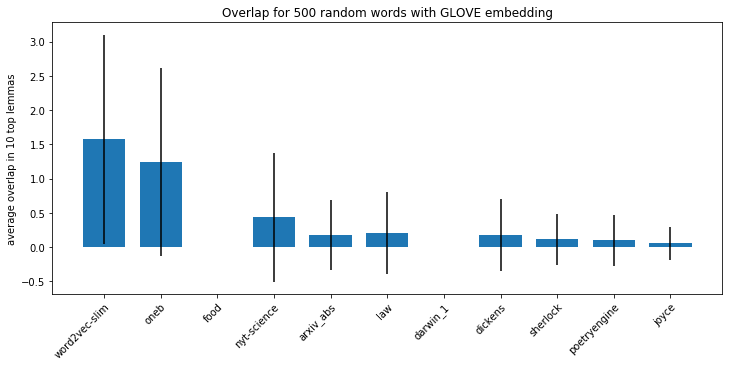

In [109]:
idx = [1, 10, 11]
# names = 
local_data = []
local_data_s = []
for name in names_o:
    if name in overlap_data:
        local_data.append(overlap_data[name][0])
        local_data_s.append(overlap_data[name][1])
    else:
        local_data.append(0)
        local_data_s.append(0)

data_o = local_data

print(data_o)
print(names_o)

ind = np.arange(len(data_o))  # the x locations for the groups
width = 0.75  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, data_o, width, yerr=local_data_s)
# rects2 = ax.bar(ind + width/2, women_means, width,
#                 color='IndianRed', label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('average overlap in 10 top lemmas')
ax.set_title('Overlap for 500 random words with GLOVE embedding')
ax.set_xticks(ind)
ax.set_xticklabels(names_o)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
# ax.legend()
fig.set_size_inches(12, 5)
plt.show()